In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import time
from datetime import datetime
import itertools
import gc
import pickle
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.decomposition import PCA

%matplotlib inline

In [ ]:
data1 = pd.read_pickle('data1.pkl')

In [ ]:
data2 = data1[['date_block_num', 'shop_id', 'item_id', 'ID', 'city_id', 'item_category_id', 'type_id', 'item_cnt_month', 
       'dec_0', 
       'dec_1',
       #'dec', 
       #'dec_mean', 
       'shop_cnt_month', 
       'category_cnt_month',
       'city_cnt_month', 
       'type_cnt_month', 
       'item_shop_price',
       'item_shop_cnt_month', 
       #'season_mean', 'season_0', 'season_1','season_2', 'season_3', 'season', 
       'season_avg_item_cnt',
       'season_item_shop_avg_cnt', 
       'season_shop_avg_cnt',
       'season_city_avg_cnt', 
       #'season_type_avg_cnt', 
       'dec_item_avg_cnt',
       'shop_close_0', 'shop_close_1', 'shop_close', 'shop_close_mean',
       'item_shop_cnt_month_lag_1', 
       'item_shop_cnt_month_lag_3',
       'item_shop_cnt_month_lag_6', 
       'item_shop_cnt_month_lag_12',
       'date_avg_item_cnt', 
       'date_avg_item_cnt_lag_1',
       'date_avg_item_cnt_lag_3', 
       'date_avg_item_cnt_lag_6',
       'date_avg_item_cnt_lag_12', 
       'date_item_avg_item_cnt',
       'date_shop_avg_item_cnt', 
       'date_shop_avg_item_cnt_lag_1',
       'date_shop_avg_item_cnt_lag_3', 
       'date_shop_avg_item_cnt_lag_6',
       'date_shop_avg_item_cnt_lag_12', 
       'date_cat_avg_item_cnt',
       'date_shop_cat_avg_item_cnt', 
       'date_city_avg_item_cnt',
       'date_item_city_avg_item_cnt'
              ]]

In [ ]:
col_list =[]
for i in data2.columns:
    if ('id' in i) | ('ID' in i) | ('date_block_num' in i) | ('item_cnt_month' in i):
        pass
    else:
        col_list.append(i)
col_list
for i in col_list:
    data2.loc[:,i] = StandardScaler().fit_transform(np.array(data2.loc[:,i]).reshape(-1,1))

C:\Users\khb16\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\khb16\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\khb16\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, ou

C:\Users\khb16\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\khb16\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
C:\Users\khb16\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(

C:\Users\khb16\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
C:\Users\khb16\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [ ]:
X = data2.drop(['item_cnt_month'], axis=1)
y = data2['item_cnt_month']

In [ ]:
PCA(n_components = 2)

PCA(n_components=2)

In [ ]:
pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(X)
pca_transformed

array([[ -6693.90236588, -11241.77487402],
       [ -6693.90744315, -11238.7649462 ],
       [ -6693.90923216, -11237.76624619],
       ...,
       [207475.07083619,   4865.39050496],
       [207469.21909388,   8756.37906125],
       [207503.1105782 ,  -9922.58958524]])

In [ ]:
pca.explained_variance_

array([9.13641177e+08, 3.93316778e+07])

In [ ]:
pca.components_

array([[ 8.55494817e-05,  5.56131792e-05, -1.76088195e-03,
         9.99998443e-01,  2.44142600e-05,  9.80762849e-06,
         3.57548522e-07,  1.65517116e-06, -1.65517116e-06,
         1.08145886e-37, -1.20068071e-37, -0.00000000e+00,
        -0.00000000e+00,  3.34846843e-07, -0.00000000e+00,
        -2.41823813e-05, -0.00000000e+00, -8.43853068e-06,
        -1.11167629e-05, -1.18116838e-06,  2.17763103e-06,
        -2.17763103e-06, -2.17763103e-06, -2.17797040e-06,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -2.41823813e-05, -1.88324055e-06,
        -1.96608309e-06, -1.70370337e-06,  6.61956259e-07,
        -1.18116838e-06, -8.43853068e-06, -1.91352634e-06,
        -1.46156591e-06, -1.69301011e-06, -1.89821282e-07,
        -1.40362307e-06, -0.00000000e+00, -1.11167629e-05,
        -0.00000000e+00],
       [-1.39291070e-05,  1.78761308e-06,  9.99998346e-01,
         1.76087856e-03,  8.28547500e-07,  4.32574547e-04,
         1.39693300e-04,  4.64

In [ ]:
df_pca = pd.DataFrame(data = pca_transformed, columns = ['pca_1','pca_2'])
df_pca

,pca_1,pca_2
0,-6693.902375,-11241.774895
1,-6693.907445,-11238.764939
2,-6693.909234,-11237.766239
3,-6693.910966,-11236.764943
4,-6693.912755,-11235.766240
...,...,...
6834011,207468.321740,7562.382512
6834012,207473.311994,5296.392043
6834013,207475.070837,4865.390494
6834014,207469.219094,8756.379049


In [ ]:
target = data_onehot['item_cnt_month'].reset_index()

In [ ]:
df_final = pd.concat([df_pca, target['item_cnt_month']], axis = 1)

In [ ]:
df_final 

,pca_1,pca_2,item_cnt_month
0,-6693.902375,-11241.774895,0.0
1,-6693.907445,-11238.764939,0.0
2,-6693.909234,-11237.766239,0.0
3,-6693.910966,-11236.764943,1.0
4,-6693.912755,-11235.766240,1.0
...,...,...,...
6834011,207468.321740,7562.382512,0.0
6834012,207473.311994,5296.392043,0.0
6834013,207475.070837,4865.390494,0.0
6834014,207469.219094,8756.379049,0.0


Populating the interactive namespace from numpy and matplotlib


C:\Users\khb16\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


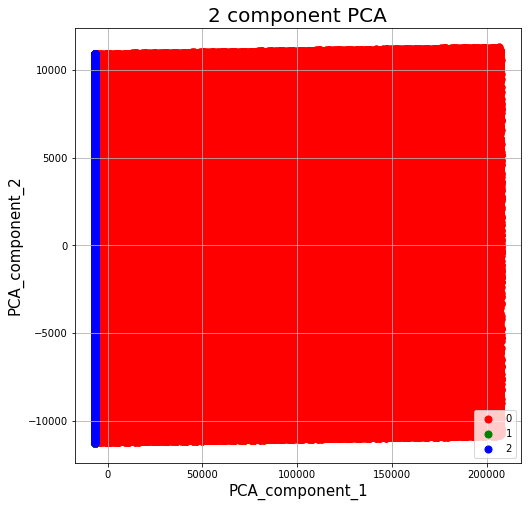

In [ ]:
import matplotlib.pyplot as plt
%pylab inline

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PCA_component_1', fontsize =15)
ax.set_ylabel('PCA_component_2', fontsize =15)
ax.set_title('2 component PCA', fontsize=20)

targets = [0, 1 , 2 ]
colors = ['r','g','b']

for target, color in zip(targets, colors):
    indicesToKeep = df_final['item_cnt_month'] == target
    ax.scatter(df_final.loc[indicesToKeep, 'pca_1'],
               df_final.loc[indicesToKeep, 'pca_2'],
               c = color,
               s = 50)
    
ax.legend(targets)
ax.grid()